In [1]:
#Install necessary modules
!pip install bs4
!pip install requests

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=a162ed5296115102ffb433028a32d16118ef5dac1b2c08a0eeeafb65cf7f4dd9
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [2]:
#Import required libraries

from bs4 import BeautifulSoup
import requests

# **Collecting data from this site** https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops

In [57]:
#sent request to the site to access the data

r = requests.get("https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops")
print(r.status_code)

200


In [4]:
soup = BeautifulSoup(r.text,'html.parser') #use beautifulsoup to scrap the data from that page

# **Collecting products name**

In [5]:
product_name = soup.findAll('a',class_="title")

In [6]:
Product_Name = []
for products in product_name :
  Product_Name.append(products.string.replace("...",""))

# **Collecting Description of the products**

In [7]:
informations = soup.find_all("p",class_ = "description card-text")

In [8]:
Description = []
for information in informations:
    Description.append(information.string)

# **Collecting price of the products**

In [9]:
prices = soup.find_all("h4","float-end price card-title pull-right")
Product_prize = []
for price in prices:
  Product_prize.append(price.string.replace("$","")) #remove dollar symbol

In [10]:
#price are in object format so convert it into floating type

Products_price = []
for x in Product_prize:
  Products_price.append(float(x))

# **Collecting reviews of the products**

In [11]:
product_reviews = soup.find_all("p",class_="float-end review-count")
reviews = []
for review in product_reviews:
  reviews.append(int(review.string.replace(" reviews","")))

## **After scraping Dataset like be**

In [12]:
import pandas as pd
df = pd.DataFrame({
    "Product Name" :Product_Name,
    "Description" : Description,
    "Price" : Products_price,
    "Reviews" : reviews
})

In [13]:
#first five rows

df.head()

,Product Name,Description,Price,Reviews
0,Asus VivoBook,"Asus VivoBook X441NA-GA190 Chocolate Black, 14...",295.99,14
1,Prestigio Smar,"Prestigio SmartBook 133S Dark Grey, 13.3"" FHD ...",299.00,8
2,Prestigio Smar,"Prestigio SmartBook 133S Gold, 13.3"" FHD IPS, ...",299.00,12
3,Aspire E1-510,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",306.99,2
4,Lenovo V110-15,"Lenovo V110-15IAP, 15.6"" HD, Celeron N3350 1.1...",321.94,5


In [14]:
#Null values
df.isna().sum()

Product Name    0
Description     0
Price           0
Reviews         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  117 non-null    object 
 1   Description   117 non-null    object 
 2   Price         117 non-null    float64
 3   Reviews       117 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ KB


# **Top ten prized products**

In [47]:
top_ten_prize_products = df.groupby('Product Name')['Price'].agg('sum').reset_index().sort_values(by='Price',ascending=False).head(10)
top_ten_prize_products

,Product Name,Price
22,Dell Latitude,15837.18
18,Asus ROG Strix,9096.83
49,Toshiba Porteg,6133.06
31,Lenovo ThinkPa,5210.72
30,Lenovo Legion,4794.82
21,Dell Inspiron,4045.82
11,Apple MacBook,3940.91
19,Asus VivoBook,3938.69
7,Acer Predator,3533.43
27,Hewlett Packar,2964.40


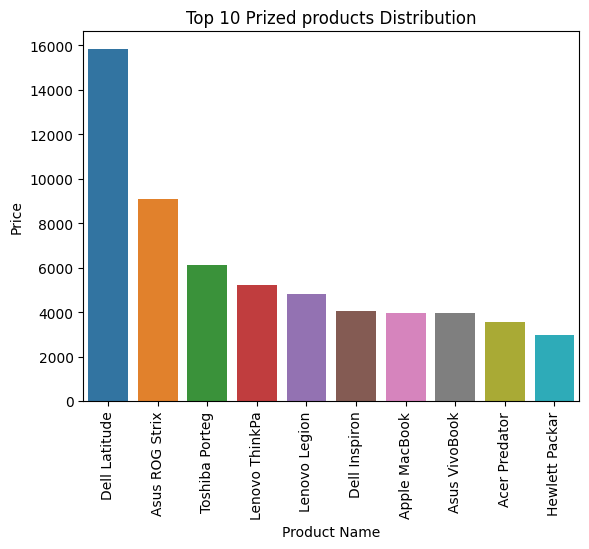

In [34]:
#Top 10 price products

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = top_ten_prize_products,x="Product Name",y="Price")
plt.xticks(rotation=90)
plt.title("Top 10 Prized products Distribution")
plt.show()

# **Top Ten review rated products**

In [38]:
top_ten_review_products = df.groupby('Product Name')['Reviews'].agg('sum').reset_index().sort_values(by='Reviews',ascending=False).head(10)
top_ten_review_products

,Product Name,Reviews
22,Dell Latitude,93
31,Lenovo ThinkPa,54
4,Acer Aspire ES,45
18,Asus ROG Strix,44
19,Asus VivoBook,38
49,Toshiba Porteg,37
0,Acer Aspire 3,34
30,Lenovo Legion,33
32,Lenovo V110-15,29
21,Dell Inspiron,26


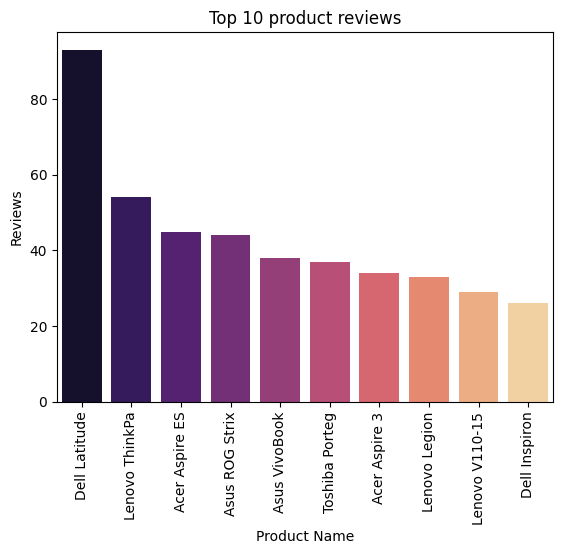

In [39]:
#Top 10

sns.barplot(data=top_ten_review_products,x="Product Name",y="Reviews",palette='magma')
plt.xticks(rotation=90)
plt.title("Top 10 product reviews")
plt.show()

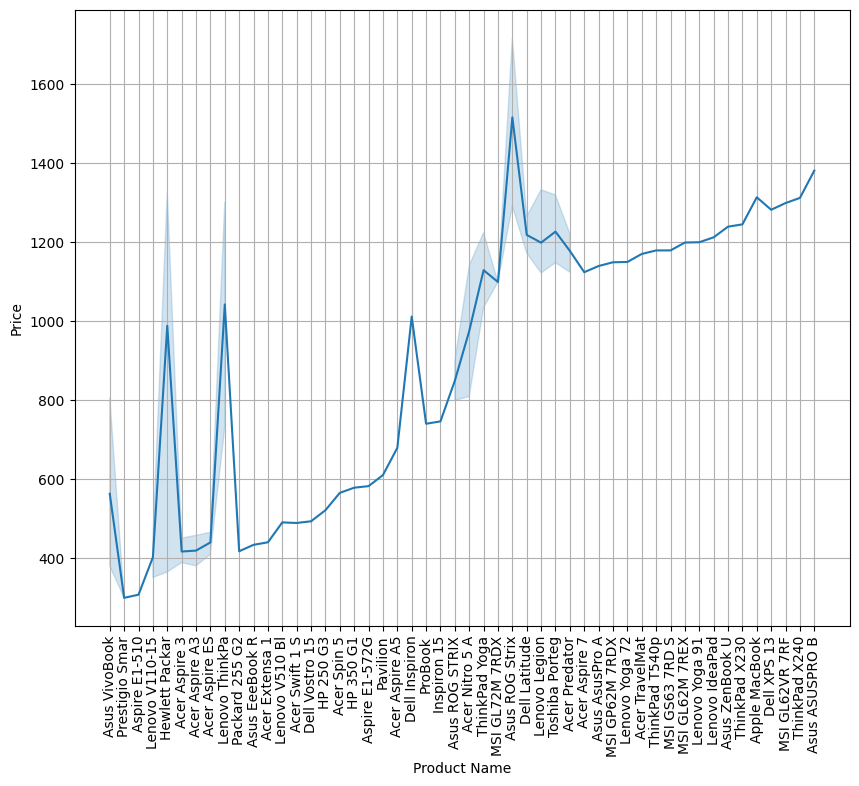

In [50]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x="Product Name",y="Price")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

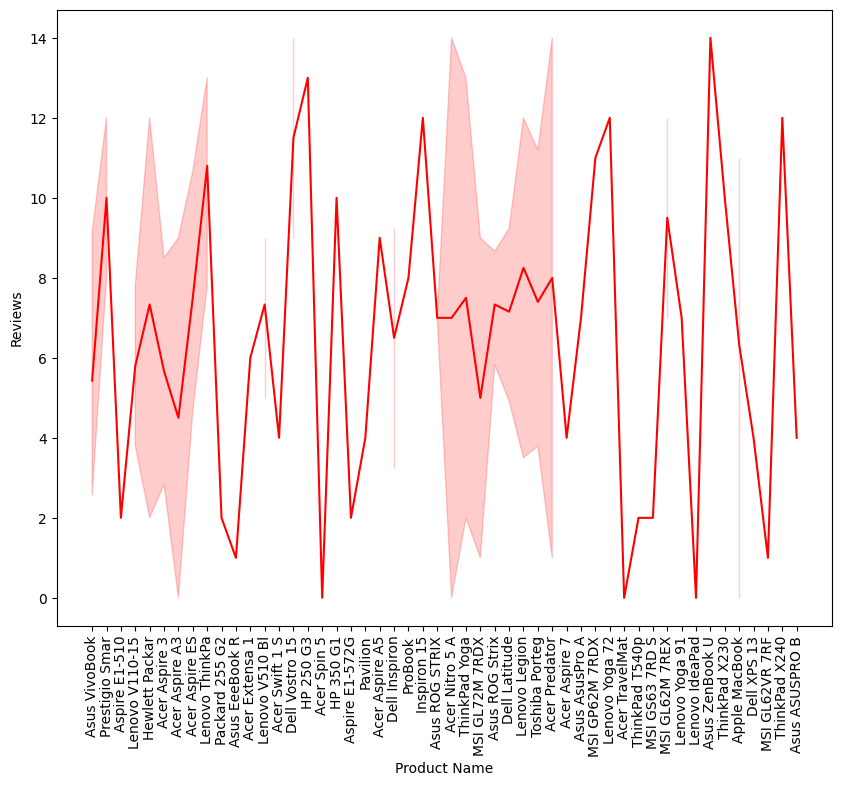

In [54]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x="Product Name",y="Reviews",color='r')
plt.xticks(rotation=90)
plt.show()

In [56]:
df.to_csv("prducts_reviews.csv",index=False)